In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn import preprocessing
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [56]:
df=pd.read_csv("cardio_train.csv",sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


age in days  
gender 1-women, 2-men  
height in cm  
weight in kg  
ap_hi Systolic blood pressure  
ap_lo Diastolic blood pressure  
cholestrol 1: normal, 2: above normal, 3: well above normal  
gluc 1: normal, 2: above normal, 3: well above normal  
cardio target variable

In [57]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [58]:
df.drop('id',axis=1,inplace=True)

In [59]:
df.duplicated().sum()

24

In [60]:
df[df.duplicated()].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0


In [61]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [62]:
df['age']=df['age']//365
df['age'].astype('int')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [63]:
df['height']=df['height']*0.0328
df['height'].astype('float')
df['height']=df['height'].round(decimals=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,5.5,62.0,110,80,1,1,0,0,1,0
1,55,1,5.1,85.0,140,90,3,1,0,0,1,1
2,51,1,5.4,64.0,130,70,3,1,0,0,0,1
3,48,2,5.5,82.0,150,100,1,1,0,0,1,1
4,47,1,5.1,56.0,100,60,1,1,0,0,0,0


{'whiskers': [<matplotlib.lines.Line2D object at 0x00000197A9145BB0>, <matplotlib.lines.Line2D object at 0x00000197A9145F10>], 'caps': [<matplotlib.lines.Line2D object at 0x00000197A91532E0>, <matplotlib.lines.Line2D object at 0x00000197A9153640>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000197A9145850>], 'medians': [<matplotlib.lines.Line2D object at 0x00000197A91539A0>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000197A9153CA0>], 'means': []}


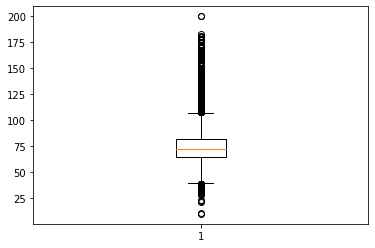

In [64]:
#print(plt.boxplot(df['age']))
print(plt.boxplot(df['weight']))
#print(plt.boxplot(df['ap_hi']))
#print(plt.boxplot(df['ap_lo']))

In [36]:
#df['weight']=df['weight'].astype('int')
#df[(df['weight']<=40) | (df['weight']>115)]
#df.drop(df[df['weight']<=40].index,inplace=True)
#df.drop(df[df['weight']>115].index,inplace=True)

In [65]:
df.dtypes

age              int64
gender           int64
height         float64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [66]:
X=df.drop(['cardio'], axis=1).copy()
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,5.5,62.0,110,80,1,1,0,0,1
1,55,1,5.1,85.0,140,90,3,1,0,0,1
2,51,1,5.4,64.0,130,70,3,1,0,0,0
3,48,2,5.5,82.0,150,100,1,1,0,0,1
4,47,1,5.1,56.0,100,60,1,1,0,0,0


In [67]:
y=df['cardio'].copy()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

[0.15293701 0.00633914 0.15664897 0.26779179 0.21202682 0.12674105
 0.05006569 0.0122893  0.00474333 0.00516756 0.00524933]


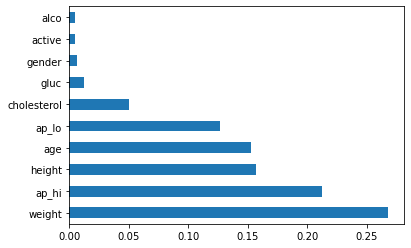

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [69]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022863,-0.080023,0.053576,0.020855,0.017619,0.154023,0.098391,-0.047664,-0.029767,-0.009994,0.238020
gender,-0.022863,1.000000,0.498928,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.080023,0.498928,1.000000,0.292342,0.005170,0.006770,-0.048130,-0.018238,0.188000,0.094712,-0.005809,-0.009984
weight,0.053576,0.155320,0.292342,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599
ap_hi,0.020855,0.005996,0.005170,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475
ap_lo,0.017619,0.015241,0.006770,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154023,-0.035915,-0.048130,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
gluc,0.098391,-0.020558,-0.018238,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047664,0.338131,0.188000,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alco,-0.029767,0.170950,0.094712,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


In [70]:
X = preprocessing.StandardScaler().fit(X).transform(X)
#get_score(SVC(), X_train, X_test, y_train, y_test)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)
print(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
print(get_score(RandomForestClassifier(n_estimators=20), X_train, X_test, y_train, y_test))
print(get_score(KNeighborsClassifier(n_neighbors=11), X_train, X_test, y_train, y_test))

0.7157311078083914
0.6988681833771578
0.661769749628444


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy').mean())
print(cross_val_score(RandomForestClassifier(n_estimators=20),X,y,cv=10,scoring='accuracy').mean())
print(cross_val_score(KNeighborsClassifier(n_neighbors=9),X,y,cv=10,scoring='accuracy').mean())

0.7211902169479976
0.6977104853208841


In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
plot_confusion_matrix(LR, X_test, y_test, display_labels=['Does not have CVD', 'Has CVD'])

In [ ]:
import pickle
pickle_out=open("LR.pkl","wb")
pickle.dump(LR, pickle_out)